In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
fandango = pd.read_csv("fandango_scrape.csv")

In [3]:
fandango

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749
...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0
500,WWE SummerSlam 2015 (2015),0.0,0.0,0
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0


<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

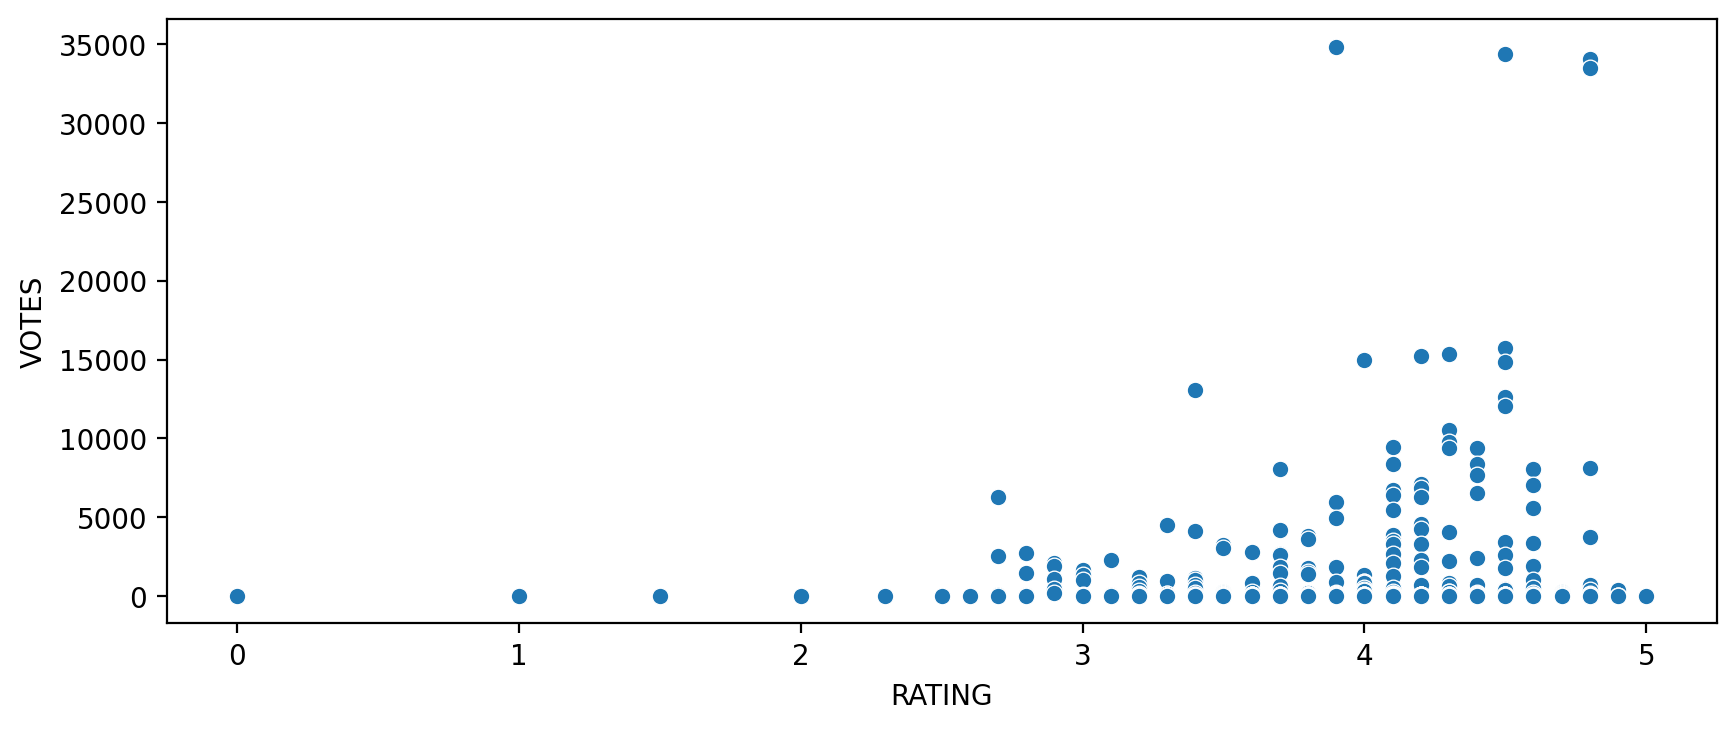

In [6]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=fandango,x='RATING',y='VOTES')

In [9]:
fandango.drop('FILM',axis=1).corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [36]:
def get_year(titles):
    return int(str(titles).split()[-1].strip('()'))

In [37]:
fandango['YEAR']=fandango['FILM'].apply(get_year)

In [38]:
fandango[:10]

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [39]:
fandango.groupby('YEAR')['FILM'].count().sort_values(ascending=False)

YEAR
2015    478
2014     23
1964      1
2012      1
2016      1
Name: FILM, dtype: int64

<AxesSubplot:xlabel='YEAR', ylabel='count'>

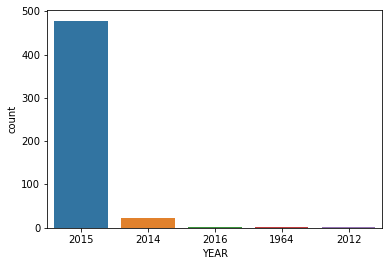

In [44]:
sns.countplot(data=fandango,x='YEAR',order=[2015,2014,2016,1964,2012])

In [46]:
fandango.sort_values('VOTES',ascending=False)[:10]

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [64]:
fandango[fandango['VOTES']==0]['FILM'].count()

69

In [69]:
fandango[fandango['VOTES']==0]

,FILM,STARS,RATING,VOTES,YEAR
435,6 Years (2015),0.0,0.0,0,2015
436,7 Minutes (2015),0.0,0.0,0,2015
437,A Year in Champagne (2015),0.0,0.0,0,2015
438,Balls Out (2015),0.0,0.0,0,2015
439,Before I Wake (2015),0.0,0.0,0,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


In [136]:
reviewed=fandango[fandango['VOTES']>0]

In [137]:
reviewed

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


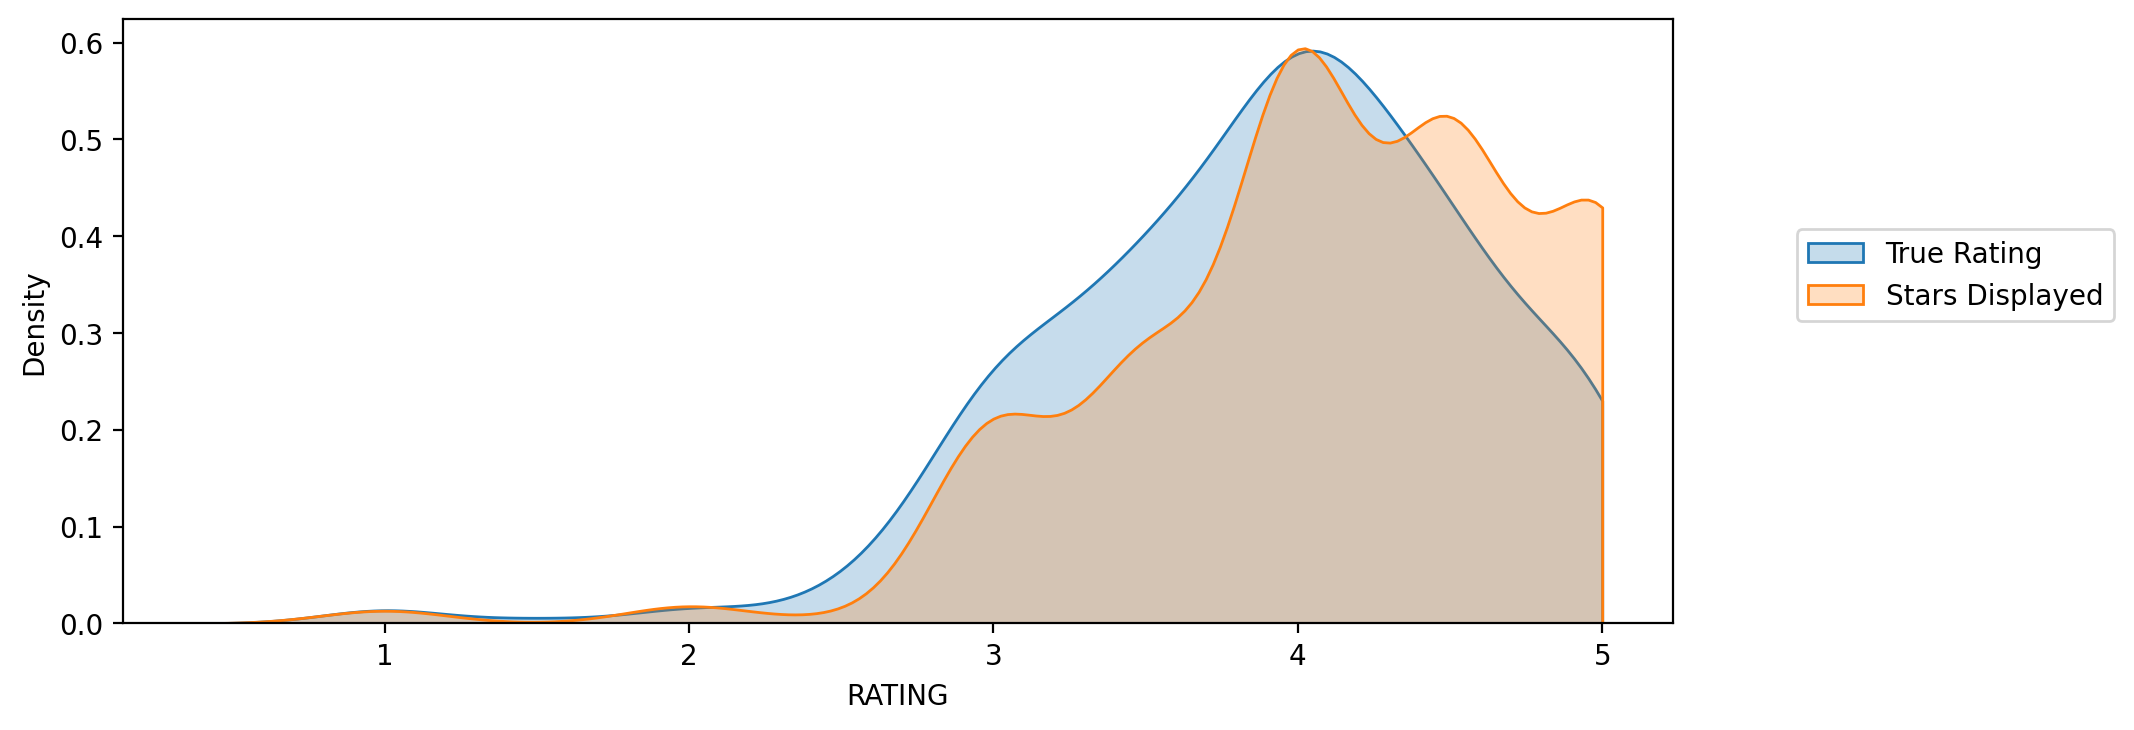

In [138]:
plt.figure(figsize=(10,4),dpi=200)
sns.kdeplot(data=reviewed,x='RATING',clip=[0,5],shade=True,label='True Rating')
sns.kdeplot(data=reviewed,x='STARS',clip=[0,5],shade=True,label='Stars Displayed')
plt.legend(loc=[1.08,0.5]);

In [155]:
reviewed['STARS_DIFF']=reviewed['STARS'] - reviewed['RATING']
round(reviewed['STARS_DIFF'],1)

C:\Users\Wale Bakre\AppData\Local\Temp\ipykernel_9336\4123016408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviewed['STARS_DIFF']=reviewed['STARS'] - reviewed['RATING']


0      0.1
1      0.0
2      0.2
3      0.2
4      0.0
      ... 
430    0.0
431    0.0
432    0.0
433    0.0
434    0.0
Name: STARS_DIFF, Length: 435, dtype: float64

In [156]:
reviewed

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


<AxesSubplot:xlabel='STARS', ylabel='count'>

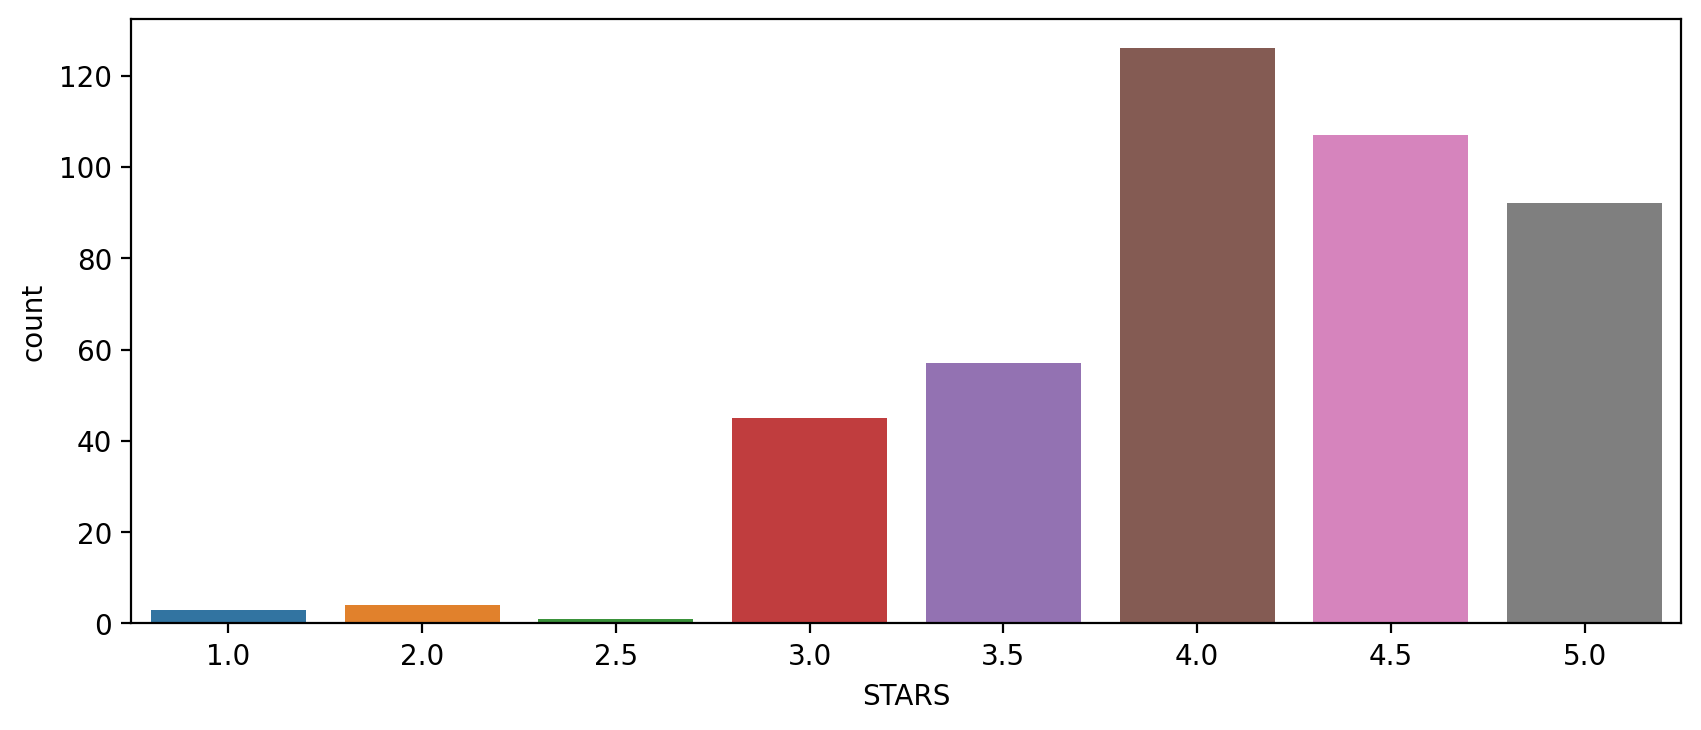

In [161]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(data=reviewed,x='STARS')

In [163]:
reviewed[reviewed['STARS_DIFF']==1.0]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


In [10]:
all_sites = pd.read_csv("all_sites_scores.csv")

In [165]:
all_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560
...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367
142,'71 (2015),97,82,83,7.5,7.2,60,24116
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955


<AxesSubplot:xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

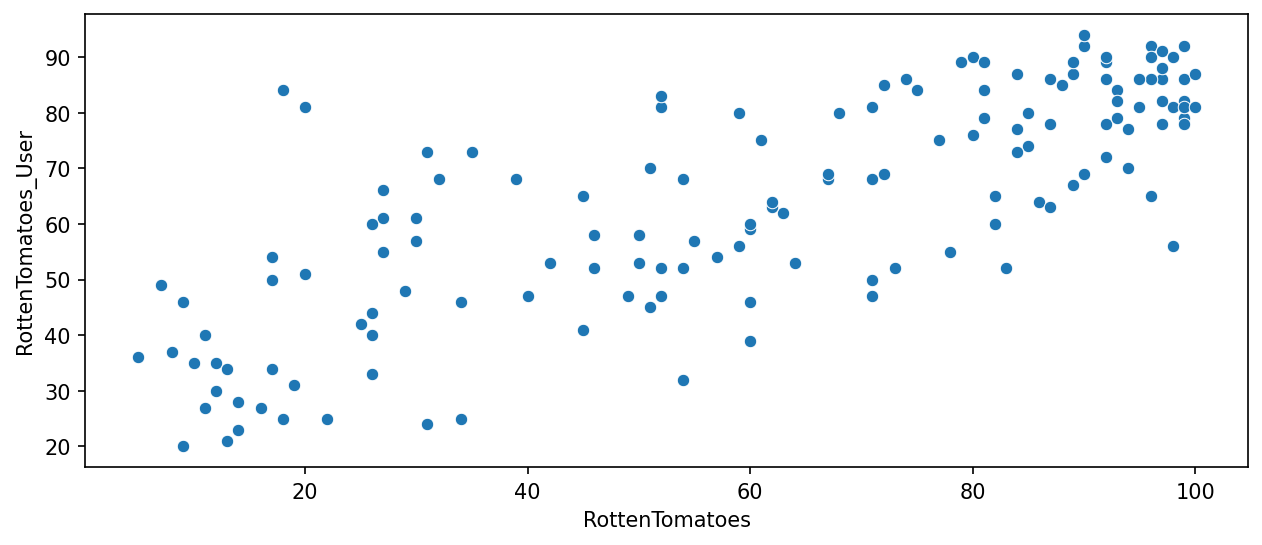

In [167]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=all_sites,x='RottenTomatoes',y='RottenTomatoes_User')

In [26]:
all_sites['Rotten_Diff']=all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

In [169]:
all_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14
...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,9
142,'71 (2015),97,82,83,7.5,7.2,60,24116,15
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,19
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19


In [27]:
all_sites['abs_Rotten_diff']=all_sites['Rotten_Diff'].abs()

<AxesSubplot:xlabel='Rotten_Diff', ylabel='Count'>

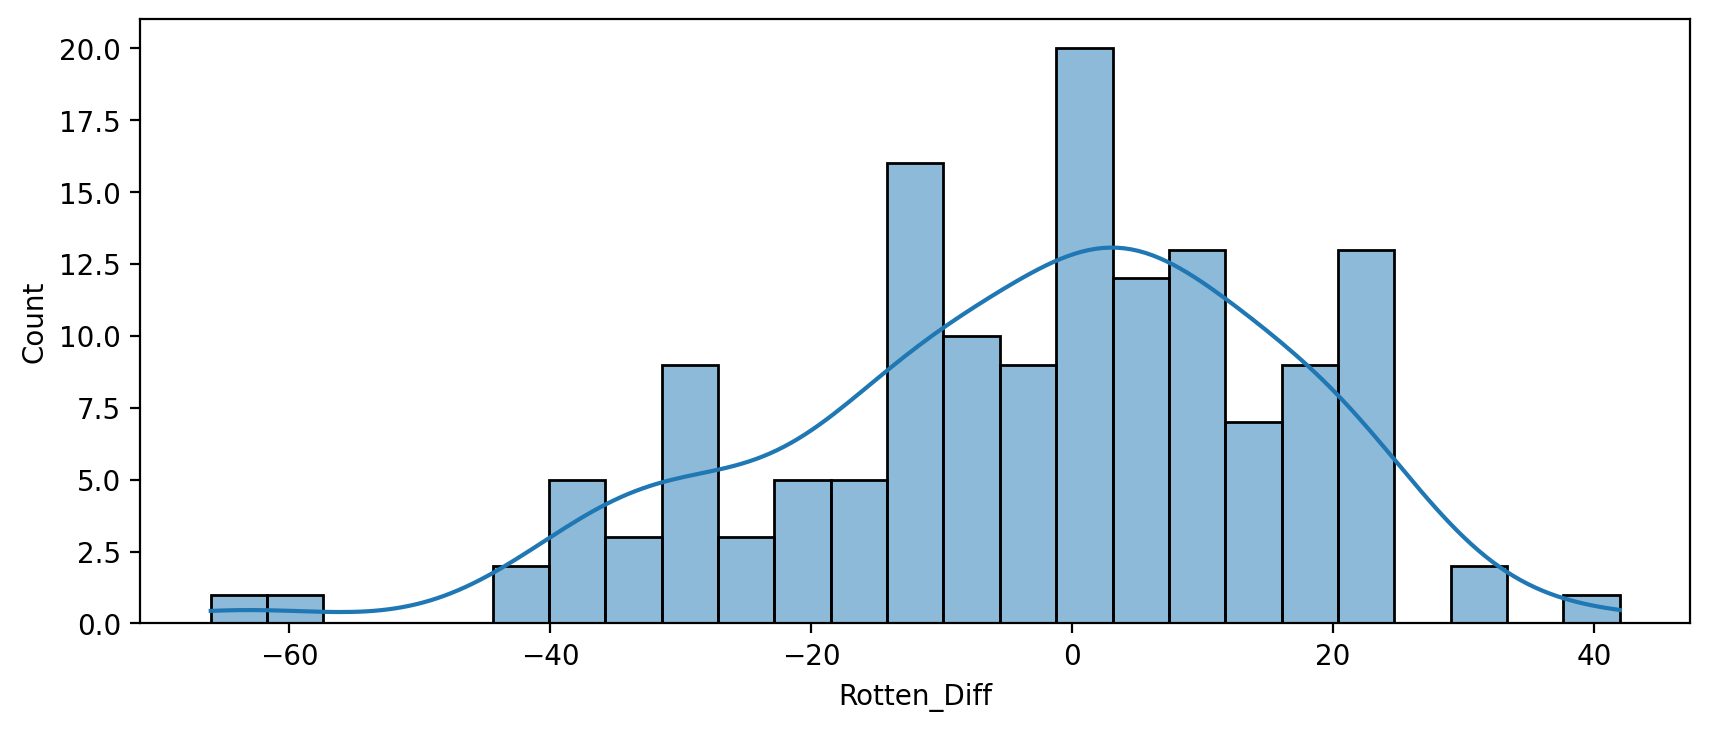

In [189]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data=all_sites,x='Rotten_Diff',kde=True,bins=25)

<AxesSubplot:xlabel='abs_Rotten_diff', ylabel='Count'>

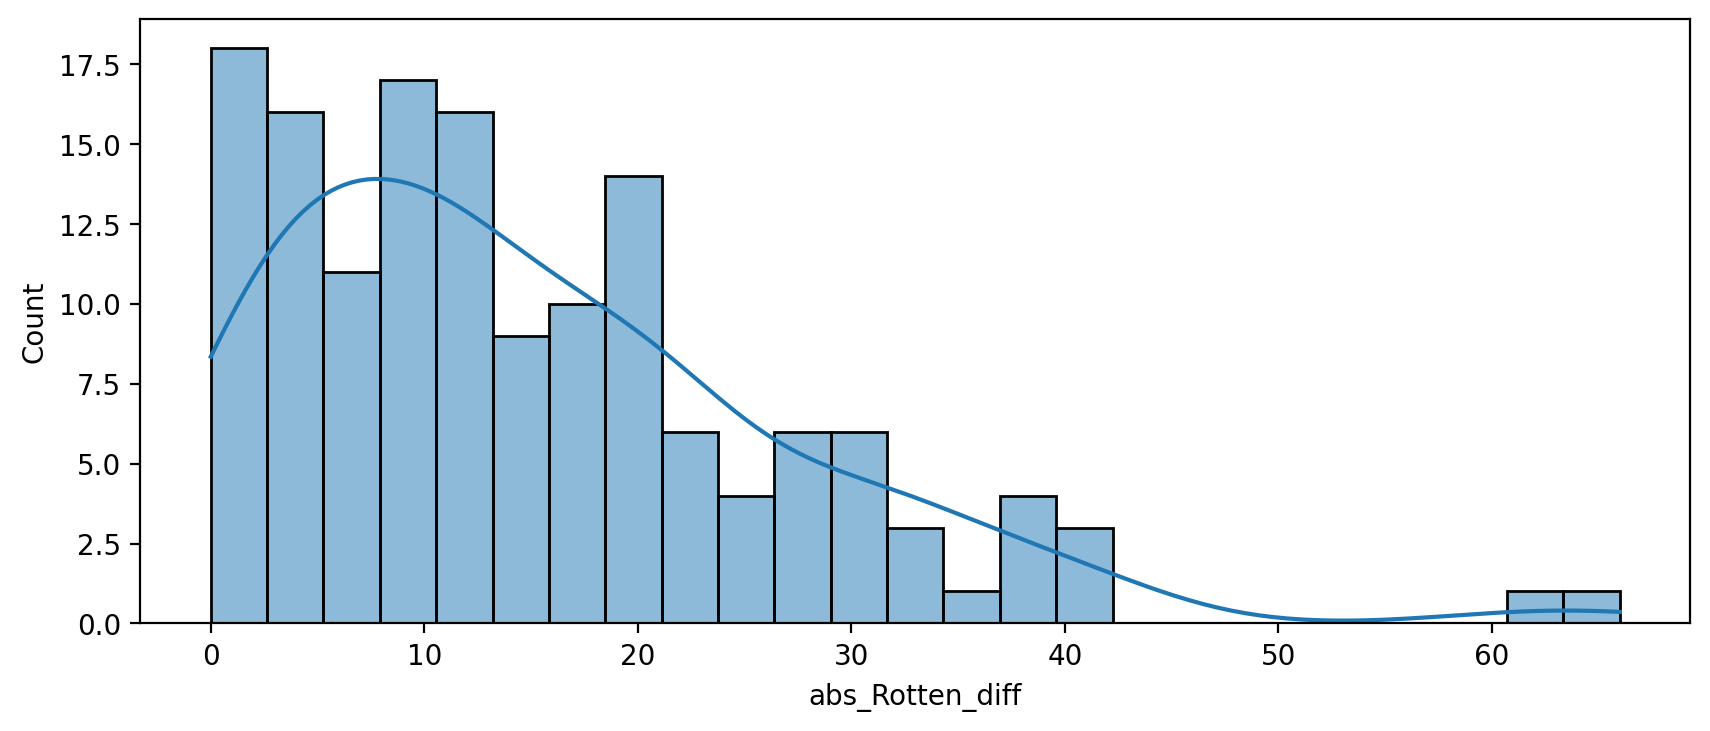

In [191]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data=all_sites,x='abs_Rotten_diff',kde=True,bins=25)

In [29]:
print("Users Love but Critics Hate")
all_sites.sort_values('Rotten_Diff',ascending=True)[['Rotten_Diff','FILM']][:5]

Users Love but Critics Hate


,Rotten_Diff,FILM
3,-66,Do You Believe? (2015)
85,-61,Little Boy (2015)
134,-42,The Longest Ride (2015)
105,-42,Hitman: Agent 47 (2015)
125,-39,The Wedding Ringer (2015)


In [30]:
print("Critics love, but Users Hate")
all_sites.sort_values('Rotten_Diff',ascending=False)[['Rotten_Diff','FILM']][:5]

Critics love, but Users Hate


,Rotten_Diff,FILM
69,42,Mr. Turner (2014)
112,31,It Follows (2015)
115,31,While We're Young (2015)
145,24,"Kumiko, The Treasure Hunter (2015)"
37,24,Welcome to Me (2015)


(0.0, 10.0)

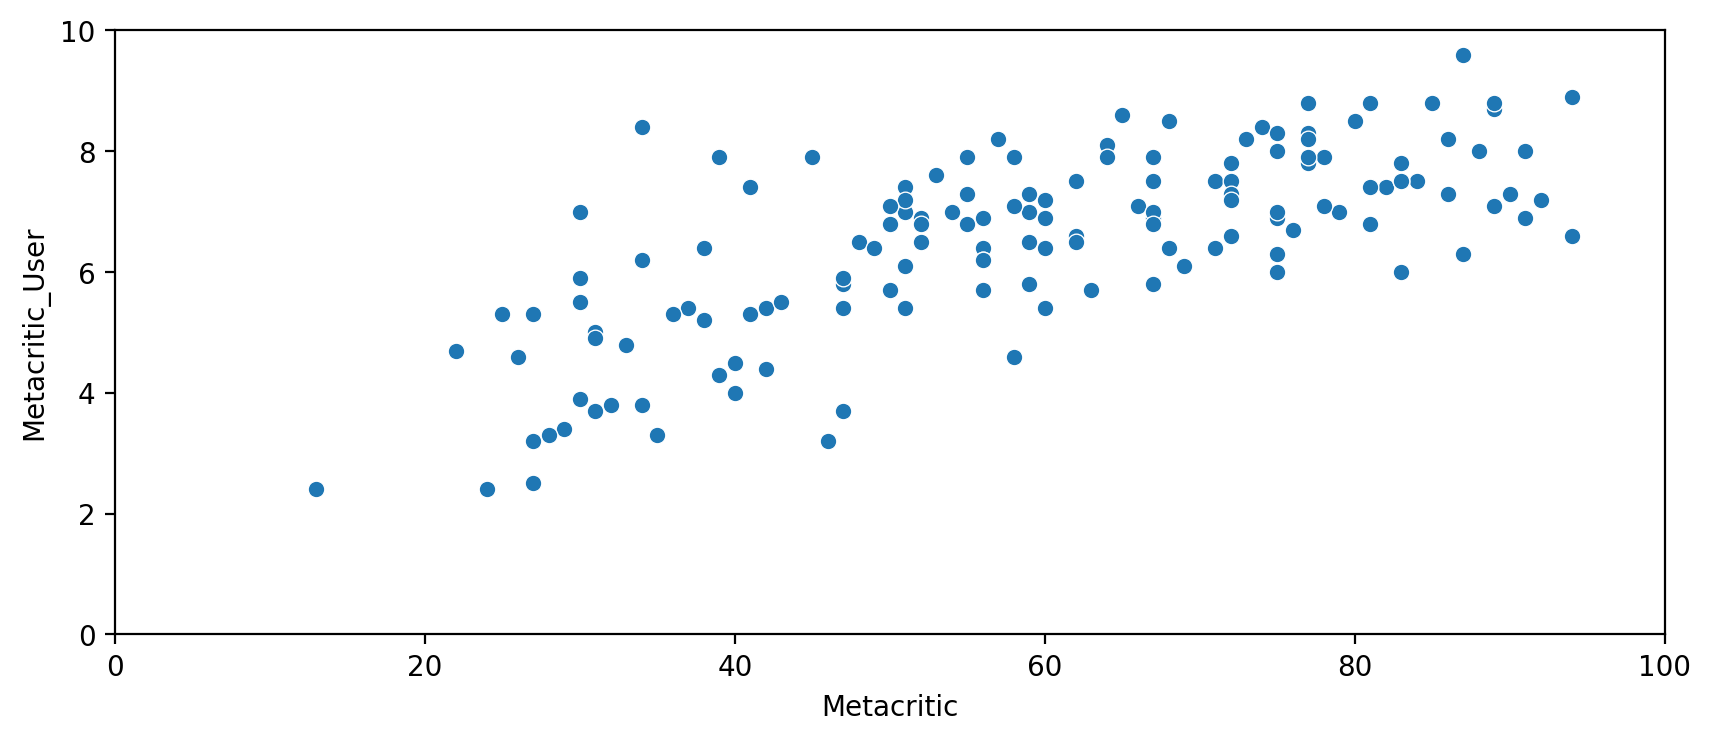

In [204]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=all_sites,x='Metacritic',y='Metacritic_User')
plt.xlim(0,100)
plt.ylim(0,10)

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

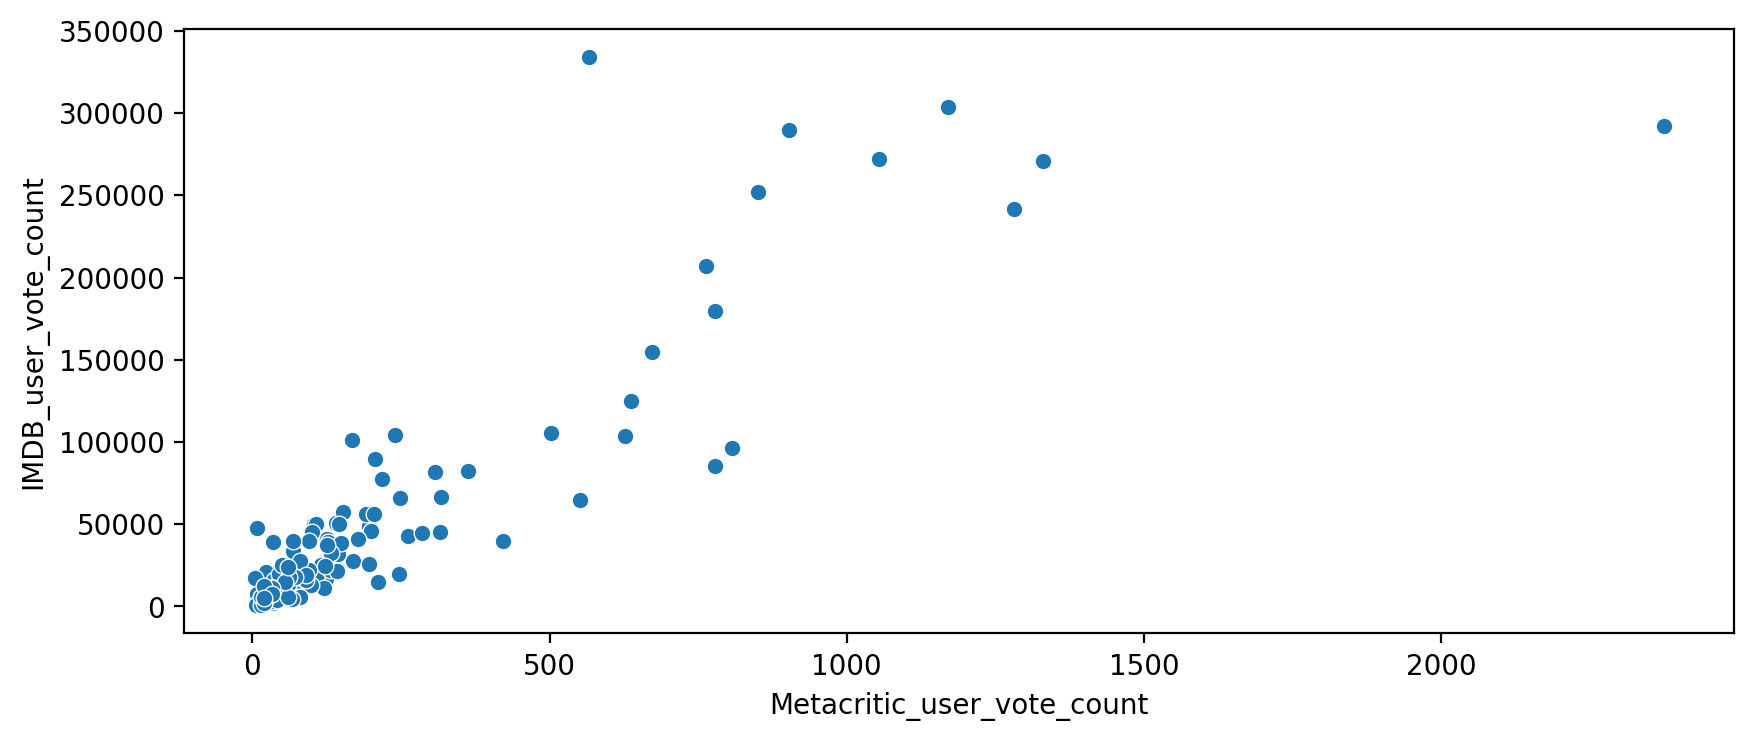

In [208]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=all_sites,y='IMDB_user_vote_count',x='Metacritic_user_vote_count')

In [214]:
all_sites.sort_values('IMDB_user_vote_count',ascending=False)[:1]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,abs_Rotten_diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2,2


In [216]:
all_sites.sort_values('Metacritic_user_vote_count',ascending=False)[:1]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,abs_Rotten_diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9,9


In [13]:
merged_data=pd.merge(fandango,all_sites,how='inner',on='FILM')

In [219]:
merged_data

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,abs_Rotten_diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1,25,42,46,3.2,4.2,778,179506,-17,17
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0,71,81,59,7.0,7.3,1281,241807,-10,10
2,American Sniper (2015),5.0,4.8,34085,2015,0.2,72,85,72,6.6,7.4,850,251856,-13,13
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2,81,84,67,6.8,7.4,764,207211,-3,3
4,Inside Out (2015),4.5,4.5,15749,2015,0.0,98,90,94,8.9,8.6,807,96252,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,0.0,87,63,68,6.4,6.7,19,5289,24,24
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,0.4,95,81,87,6.3,7.0,18,1107,14,14
142,The Wrecking Crew (2015),4.5,4.2,38,2015,0.3,93,84,67,7.0,7.8,4,732,9,9
143,Tangerine (2015),4.0,3.9,36,2015,0.1,95,86,86,7.3,7.4,14,696,9,9


In [15]:
merged_data['RT_Norm']=(merged_data['RottenTomatoes']/100)*5
merged_data['RTU_Norm']=(merged_data['RottenTomatoes_User']/100)*5
merged_data['Meta_Norm']=(merged_data['Metacritic']/100)*5
merged_data['Meta_U_Norm']=(merged_data['Metacritic_User']/10)*5
merged_data['IMDB_Norm']=(merged_data['IMDB']/10)*5

In [16]:
merged_data['RT_Norm']=round(merged_data['RT_Norm'],1)
merged_data['RTU_Norm']=round(merged_data['RTU_Norm'],1)
merged_data['Meta_Norm']=round(merged_data['Meta_Norm'],1)
merged_data['Meta_U_Norm']=round(merged_data['Meta_U_Norm'],1)
merged_data['IMDB_Norm']=round(merged_data['IMDB_Norm'],1)

In [17]:
merged_data

,FILM,STARS,RATING,VOTES,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,25,42,46,3.2,4.2,778,179506,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,71,81,59,7.0,7.3,1281,241807,3.6,4.1,2.9,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,72,85,72,6.6,7.4,850,251856,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,81,84,67,6.8,7.4,764,207211,4.1,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,98,90,94,8.9,8.6,807,96252,4.9,4.5,4.7,4.4,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,87,63,68,6.4,6.7,19,5289,4.4,3.2,3.4,3.2,3.4
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,95,81,87,6.3,7.0,18,1107,4.8,4.1,4.4,3.2,3.5
142,The Wrecking Crew (2015),4.5,4.2,38,93,84,67,7.0,7.8,4,732,4.6,4.2,3.4,3.5,3.9
143,Tangerine (2015),4.0,3.9,36,95,86,86,7.3,7.4,14,696,4.8,4.3,4.3,3.6,3.7


In [18]:
norm_scores=merged_data[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm','FILM']]

In [235]:
norm_scores

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.1,2.9,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.1,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3
...,...,...,...,...,...,...,...
140,3.5,3.5,4.4,3.2,3.4,3.2,3.4
141,4.0,3.6,4.8,4.1,4.4,3.2,3.5
142,4.5,4.2,4.6,4.2,3.4,3.5,3.9
143,4.0,3.9,4.8,4.3,4.3,3.6,3.7


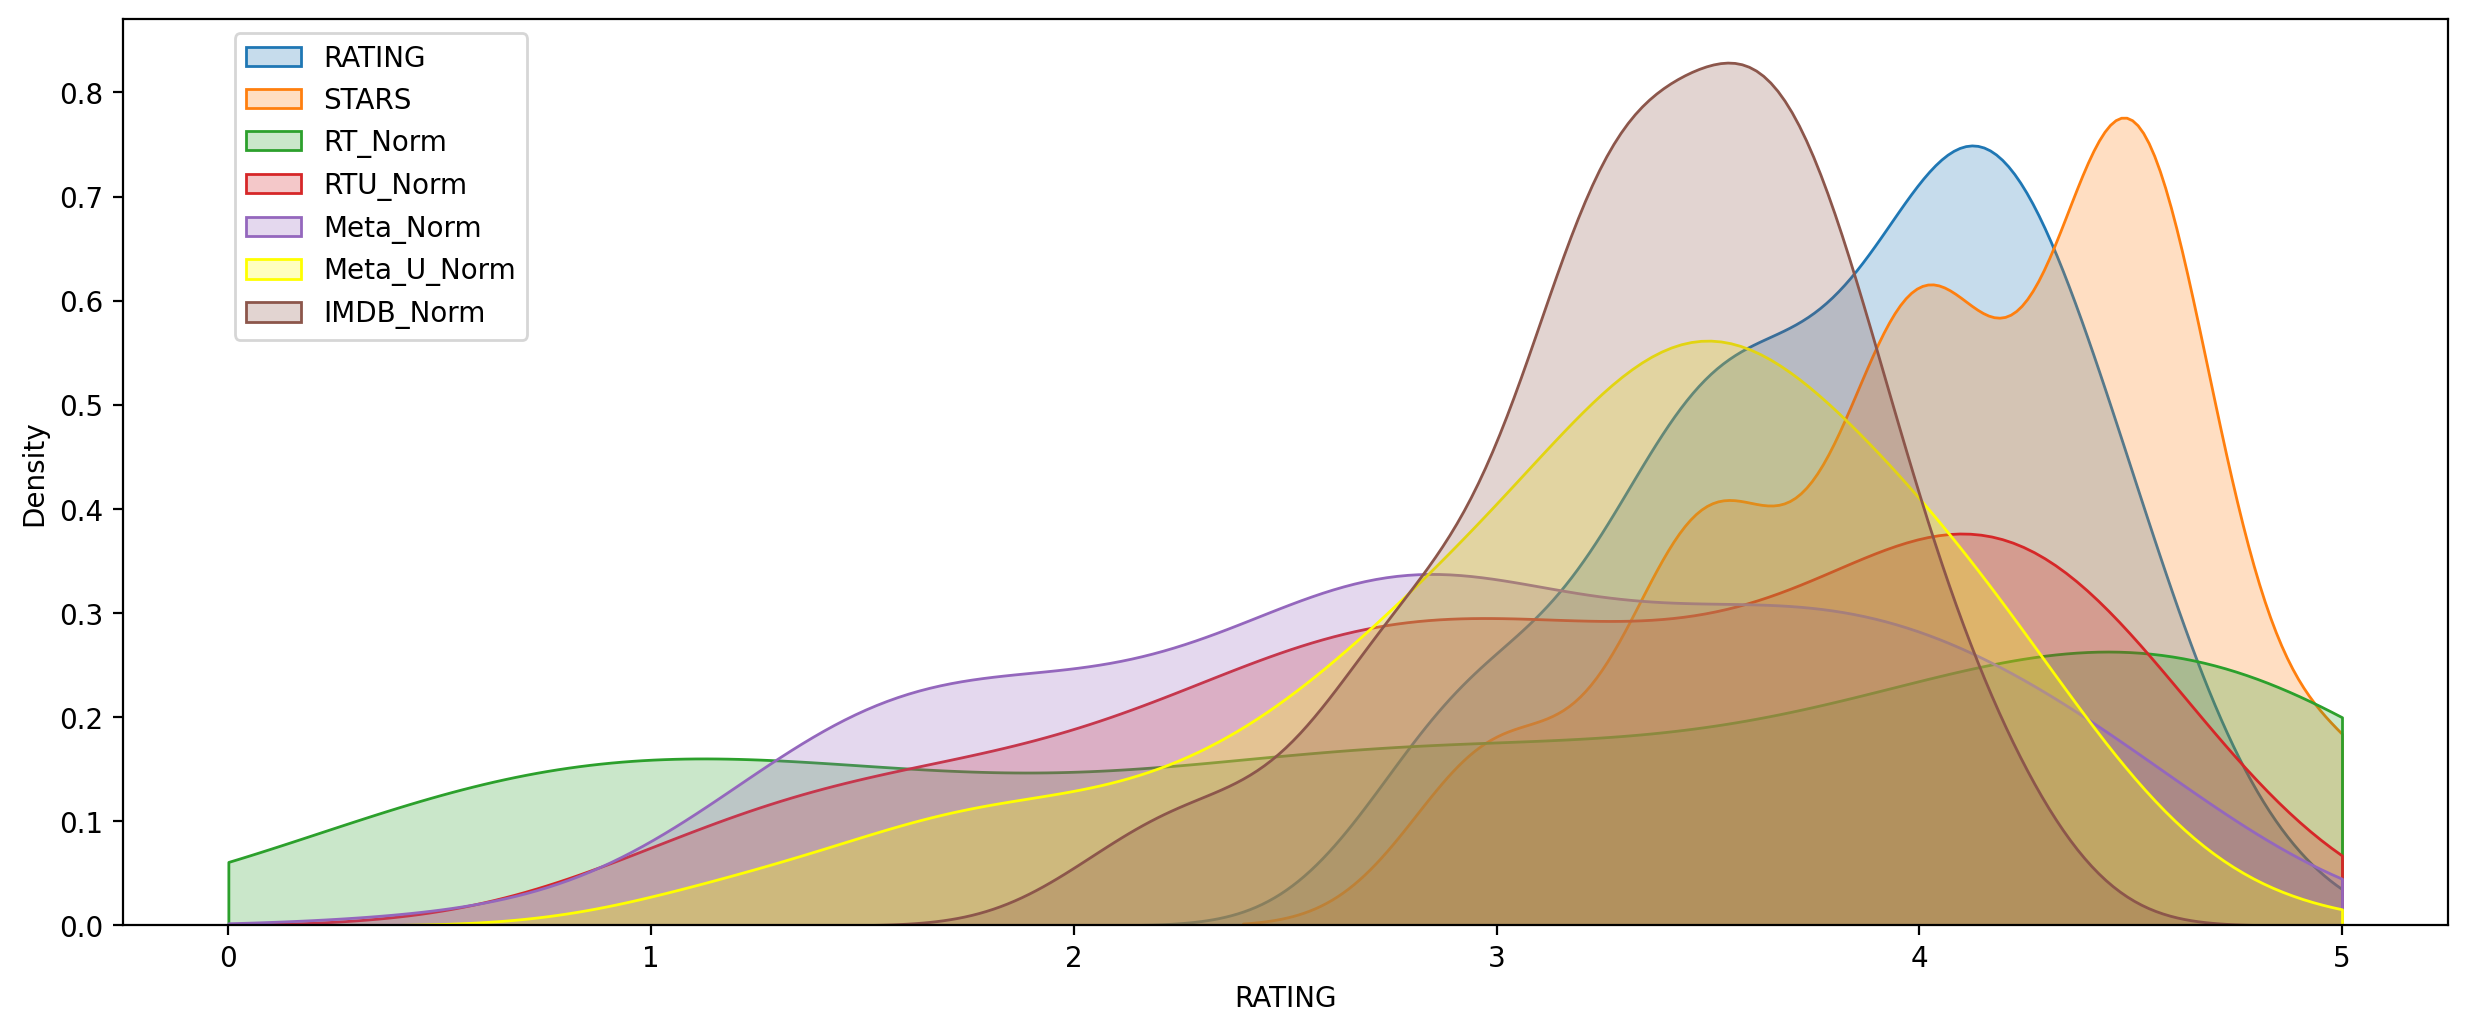

In [255]:
plt.figure(figsize=(15,6),dpi=200)

sns.kdeplot(data=norm_scores,x='RATING',clip=[0,5],shade=True,label='RATING')
sns.kdeplot(data=norm_scores,x='STARS',clip=[0,5],shade=True,label='STARS')
sns.kdeplot(data=norm_scores,x='RT_Norm',clip=[0,5],shade=True,label='RT_Norm')
sns.kdeplot(data=norm_scores,x='RTU_Norm',clip=[0,5],shade=True,label='RTU_Norm')
sns.kdeplot(data=norm_scores,x='Meta_Norm',clip=[0,5],shade=True,label='Meta_Norm')
sns.kdeplot(data=norm_scores,x='Meta_U_Norm',clip=[0,5],color='yellow',shade=True,label='Meta_U_Norm')
sns.kdeplot(data=norm_scores,x='IMDB_Norm',clip=[0,5],shade=True,label='IMDB_Norm')

plt.legend(bbox_to_anchor=[0.18,1])

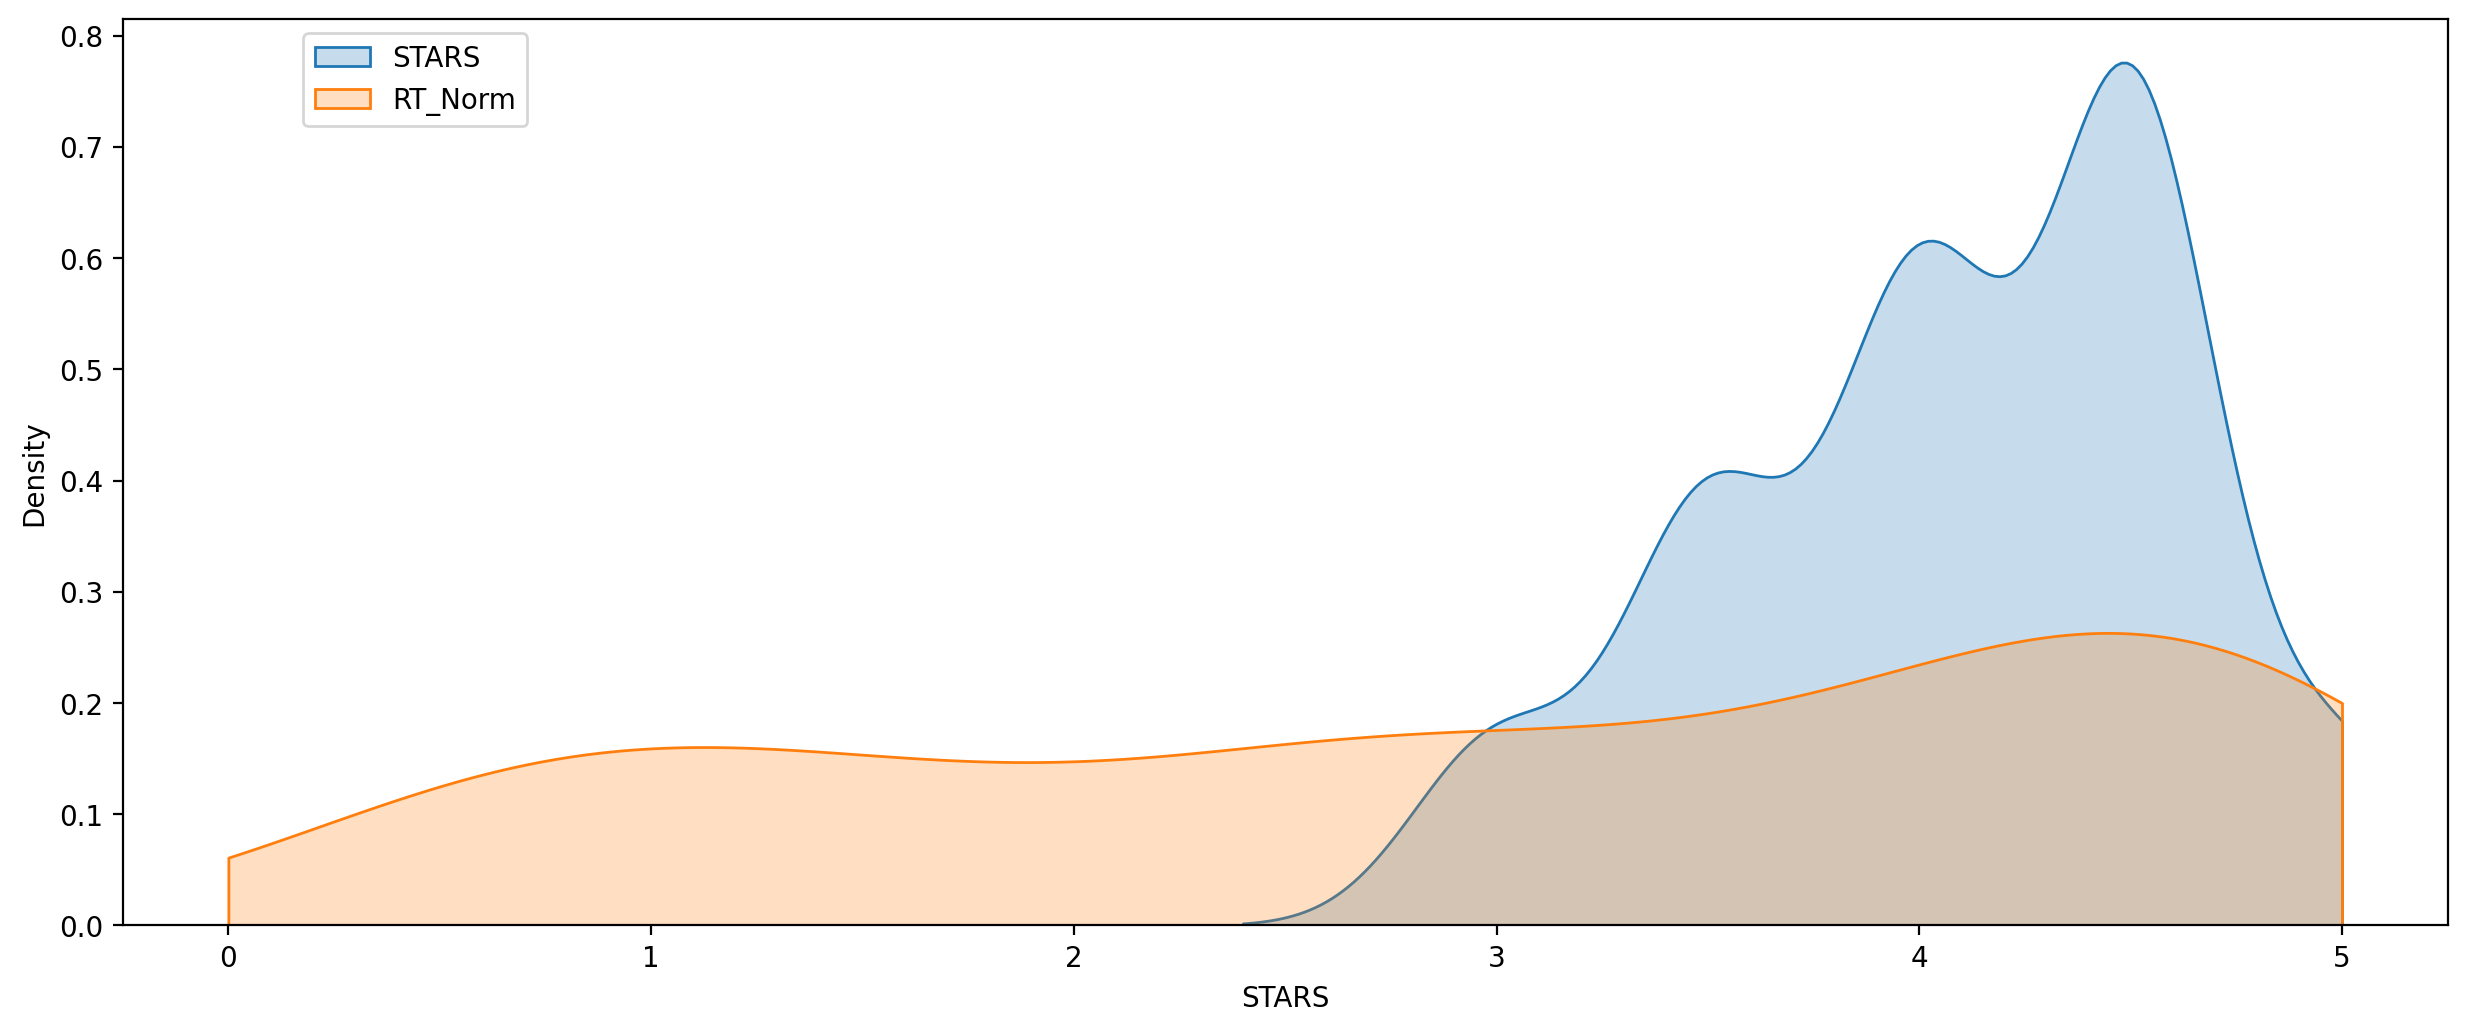

In [24]:
plt.figure(figsize=(15,6),dpi=200)
sns.kdeplot(data=norm_scores,x='STARS',clip=[0,5],shade=True,label='STARS')
sns.kdeplot(data=norm_scores,x='RT_Norm',clip=[0,5],shade=True,label='RT_Norm')
plt.legend(bbox_to_anchor=[0.18,1])


<AxesSubplot:ylabel='Count'>

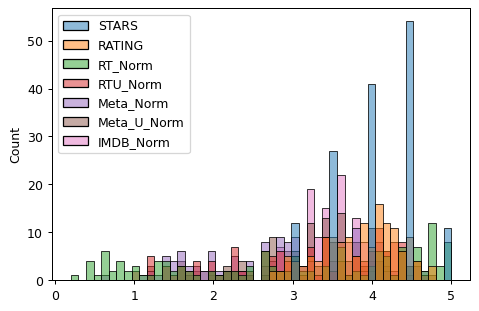

In [269]:
plt.figure(dpi=90)
sns.histplot(data=norm_scores,bins=50)

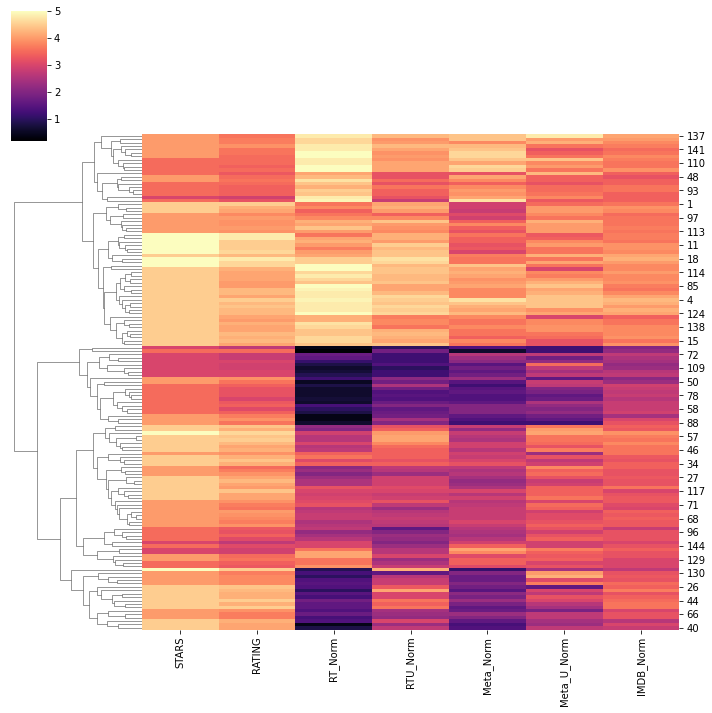

In [272]:
sns.clustermap(data=norm_scores,cmap='magma',col_cluster=False)

In [32]:
ten_norm_scores=norm_scores.sort_values('RT_Norm',ascending=True)[:10]

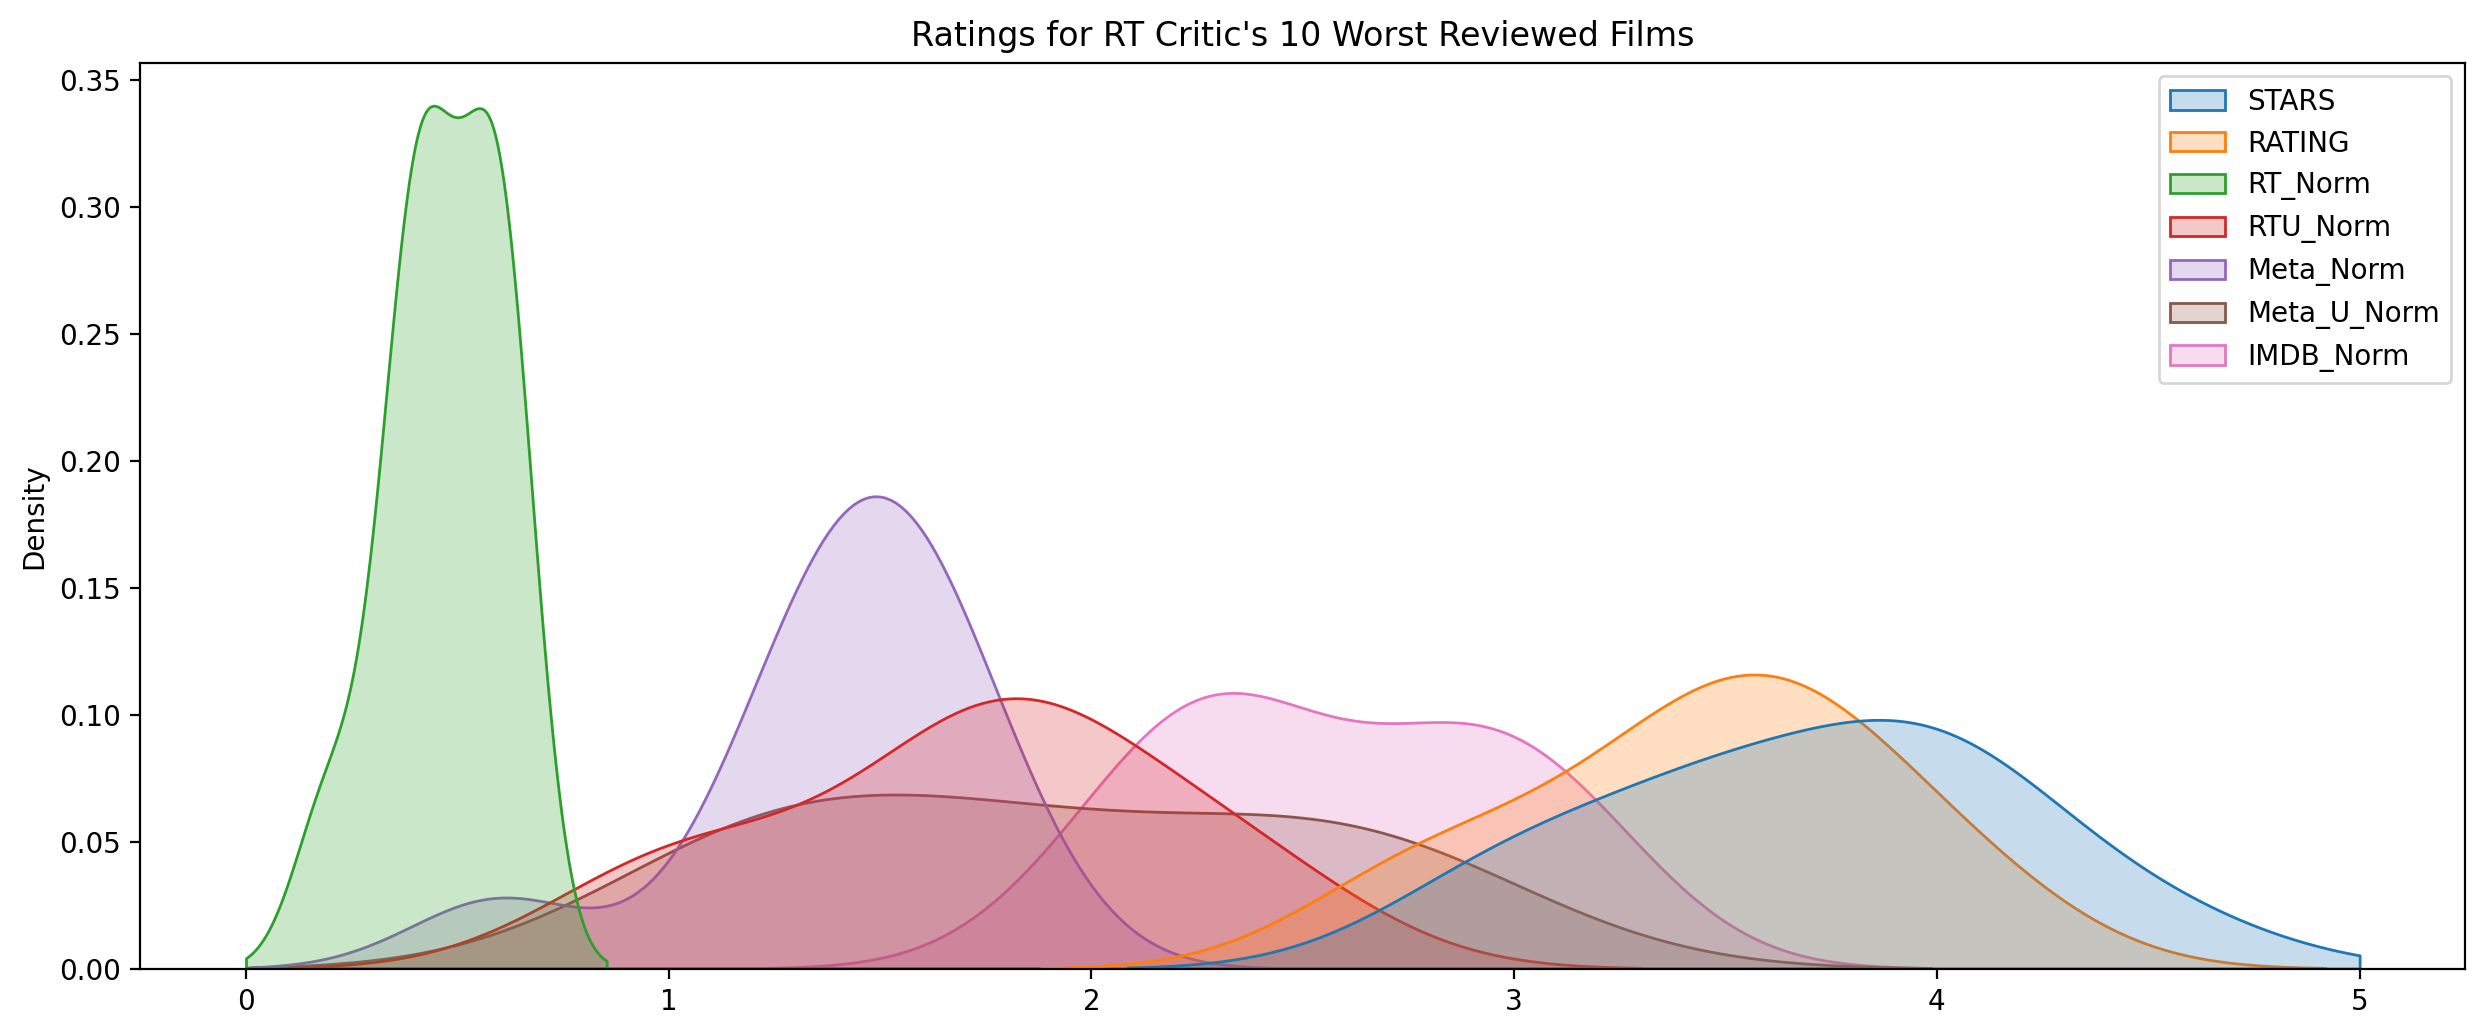

In [33]:
plt.figure(figsize=(15,6),dpi=200)
sns.kdeplot(data=ten_norm_scores,shade=True,clip=[0,5])
plt.title("Ratings for RT Critic's 10 Worst Reviewed Films");

In [282]:
ten_norm_scores

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
109,3.0,2.9,0.6,1.0,1.8,2.7,2.3,The Vatican Tapes (2015)
88,4.0,3.6,0.6,2.0,1.2,1.2,3.2,The Loft (2015)
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8,Sinister 2 (2015)
